In [189]:
import pandas as pd
import numpy as np

df = pd.read_csv('datos2.csv', names=['date', 'open', 'high', 'low', 'close', 'volume', 'unknown'])
df = df[['date', 'open', 'high', 'low', 'close']]

##### Algoritmos

In [190]:
df['MA_100'] = df.close.rolling(100).mean()

##### Estrategia

In [191]:
def open_position(row):
    if (str(row.name) == '0'):
        return None
    previous = df.loc[int(row.name) - 1]    
    condition = (
        (row.close < row.MA_100 and previous.type == 'buy') 
        or
        (row.close > row.MA_100 and previous.type == 'sell')
    )
    return row.close if condition else None

def close_position(row):
    if (str(row.name) == '0'):
        return None
    previous = df.loc[int(row.name) - 1]    
    condition = (
        (row.close < row.MA_100 and previous.type == 'buy') 
        or
        (row.close > row.MA_100 and previous.type == 'sell')
    )
    return row.close if condition else None

def position_type(row):
    return 'sell' if row['close'] < row['MA_100'] else 'buy'

df['type'] = df.apply(lambda x: position_type(x), axis=1) 
df['OP_O'] = df.apply(lambda x: open_position(x), axis=1)
df['OP_C'] = df.apply(lambda x: close_position(x), axis=1)
df.loc[215:230]

,date,open,high,low,close,MA_100,type,OP_O,OP_C
215,2012.04.30 00:00,1404.1,1406.3,1393.7,1399.2,1359.498,buy,NaN,NaN
216,2012.05.01 00:00,1399.0,1415.4,1395.2,1404.7,1360.766,buy,NaN,NaN
217,2012.05.02 00:00,1404.4,1408.3,1393.3,1401.7,1361.994,buy,NaN,NaN
218,2012.05.03 00:00,1401.9,1406.3,1388.4,1390.4,1363.159,buy,NaN,NaN
219,2012.05.04 00:00,1390.7,1392.7,1365.7,1366.5,1364.007,buy,NaN,NaN
220,2012.05.06 00:00,1357.7,1358.2,1346.2,1352.5,1364.643,sell,1352.5,1352.5
221,2012.05.07 00:00,1352.7,1373.8,1349.8,1370.4,1365.428,buy,1370.4,1370.4
222,2012.05.08 00:00,1370.2,1371.5,1347.7,1361.5,1366.080,sell,1361.5,1361.5
223,2012.05.09 00:00,1361.3,1364.0,1342.8,1352.0,1366.688,sell,NaN,NaN
224,2012.05.10 00:00,1352.3,1366.8,1347.0,1351.8,1367.299,sell,NaN,NaN


In [207]:
results = df[['date', 'OP_O', 'OP_C', 'type']]
results = results.dropna().reset_index(drop=True)
results['OP_C'] = results['OP_C'].shift(-1)
results['total'] = results['OP_O'] - results['OP_C']

results['type_2'] = results['type'].shift(1)
results.loc[results['type_2'] == 'sell', 'total'] = results[results['type_2'] == 'sell']['total'] * -1
results.loc[results['type_2'] == 'buy', 'total'] = results[results['type_2'] == 'buy']['total']
results['total_sum'] = results.total.cumsum()
results = results[['date', 'OP_O', 'OP_C', 'type', 'total', 'total_sum']]
results


,date,OP_O,OP_C,type,total,total_sum
0,2012.05.06 00:00,1352.50,1370.40,sell,-17.90,-17.90
1,2012.05.07 00:00,1370.40,1361.50,buy,-8.90,-26.80
2,2012.05.08 00:00,1361.50,1364.20,sell,-2.70,-29.50
3,2012.06.29 00:00,1364.20,1357.40,buy,-6.80,-36.30
4,2012.07.06 00:00,1357.40,1357.70,sell,-0.30,-36.60
...,...,...,...,...,...,...
1758,2022.04.28 12:00,4250.63,4267.49,sell,-16.86,1228.25
1759,2022.04.28 19:00,4267.49,4219.09,buy,-48.40,1179.85
1760,2022.04.29 17:00,4219.09,4191.76,sell,27.33,1207.18
1761,2022.05.04 19:00,4191.76,4178.53,buy,-13.23,1193.95


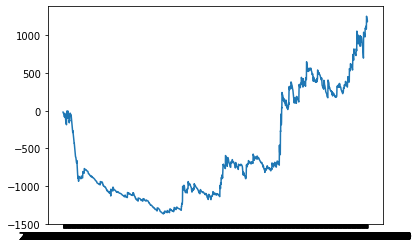

In [193]:
import matplotlib.pyplot as plt


plt.plot(results.date, results.total_sum)
plt.show()